In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt

In [104]:
def plot_heatmap(Pq2_path, U):
    file = h5py.File(Pq2_path)
    data = np.array(file["Pmn2_avg"])
    U_index = list(file["U"]).index(U)

    plt.imshow(np.transpose(np.log10(abs(data[U_index,::-1,::-1]))), vmin=-5, vmax=0, origin='lower')
    plt.colorbar(label="$log P$")
    plt.xlabel("$N_{A\\downarrow}$")
    plt.ylabel("$N_{A\\uparrow}$")
    plt.title("$U={}$".format(U))
    plt.show()

In [2]:
def two_site_etgent(U):
    S = np.sqrt(U**2 + 16)
    C = 8/(16+(U+S)**2)
    D = (U+S)/4

    return -np.log(2*C**2 * (1+D**4))

two_site_etgent = np.vectorize(two_site_etgent)

In [19]:
def two_site_n_dist(U, n):
    S = np.sqrt(U**2 + 16)
    C = 8/(16+(U+S)**2)
    D = (U+S)/4

    if n == 0:
        return 1/(2*(1+D**4))
    elif n == 1:
        return D**4/(1+D**4)
    elif n == 2:
        return 1/(2*(1+D**4))
    

two_site_n_dist = np.vectorize(two_site_n_dist)

In [16]:
print(two_site_n_dist(2, 1))

0.872677996249965


In [3]:
def two_site_m_dist(U, m):
    S = np.sqrt(U**2 + 16)
    C = 8/(16+(U+S)**2)
    D = (U+S)/4

    if m == -1:
        return D**4/(2*(1+D**4))
    elif m == 0:
        return 1/(1+D**4)
    elif m == 1:
        return D**4/(2*(1+D**4))
    
two_site_m_dist = np.vectorize(two_site_m_dist)

In [5]:
def two_site_n_shannon(U):
    S = np.sqrt(U**2 + 16)
    C = 8/(16+(U+S)**2)
    D = (U+S)/4

    return 2*np.log((D**2 + np.sqrt(2))/(np.sqrt(1 + D**4)))

two_site_n_shannon = np.vectorize(two_site_n_shannon)

In [6]:
def two_site_m_shannon(U):
    S = np.sqrt(U**2 + 16)
    C = 8/(16+(U+S)**2)
    D = (U+S)/4

    return 2*np.log((1 + np.sqrt(2)*D**2)/(np.sqrt(1 + D**4)))

two_site_m_shannon = np.vectorize(two_site_m_shannon)

In [ ]:
def plot_distribution_two_site(Pq2_path, U):
    file = h5py.File(Pq2_path)
    avg_n = np.array(file["Pn2_avg"])
    avg_m = np.array(file["Pm2_avg"])
    err_n = np.array(file["Pn2_err"])
    err_m = np.array(file["Pm2_err"])
    U_index = list(file["U"]).index(U)

    n_list = range(len(avg_n[U_index, :]))
    m_list = range(-int((len(avg_m[U_index, :])-1)/2), int((len(avg_m[U_index, :])-1)/2 + 1))

    n_exact = two_site_n_dist(U, np.array(n_list))
    m_exact = two_site_m_dist(U, np.array(m_list))

    plt.errorbar(n_list, np.flip(avg_n[U_index, :]), yerr=err_n[U_index, :], label="$P_{n,2}$ AFQMC")
    plt.plot(n_list, n_exact, label="$P_{n,2}$ exact")
    plt.errorbar(m_list, avg_m[U_index, :], yerr=err_m[U_index, :], label="$P_{m,2}$ AFQMC")
    plt.plot(m_list, m_exact, label="$P_{m,2}$ exact")
    plt.ylim(top=1.0,bottom=0.0)
    plt.xlabel("$q_A$")
    plt.ylabel("$P_q$")
    plt.legend()
    plt.title("$U={}$".format(U))
    plt.show()

In [7]:
def plot_etgent_two_site(EtgEnt_path):
    file_etgent = h5py.File(EtgEnt_path)
    U_list = np.array(file_etgent["U"])

    avg_etgent = np.array(file_etgent["S2_avg"])
    err_etgent = np.array(file_etgent["S2_err"])

    exact_etgent = two_site_etgent(U_list)

    plt.errorbar(U_list, avg_etgent, yerr=err_etgent, label="AFQMC", linestyle='dashed', linewidth=2.0)
    plt.plot(U_list, exact_etgent, label="Exact")
    plt.xlim(left=min(U_list), right=max(U_list))
    plt.xlabel("$U$")
    plt.ylabel("Renyi-2 Entropy")
    plt.legend()
    plt.show()

In [12]:
def plot_n_shannon(Hq2_path):
    file = h5py.File(Hq2_path)
    U_list = np.array(file["U"])

    avg_n = np.array(file["Hn2_avg"])
    err_n = np.array(file["Hn2_err"])

    exact_n = two_site_n_shannon(U_list)

    plt.errorbar(U_list, avg_n, yerr=err_n, label="$H_{n,1/2}$")
    plt.plot(U_list, exact_n, label="$H_{n,1/2}$ exact")
    plt.xlim(left=min(U_list), right=max(U_list))
    plt.xlabel("$U$")
    plt.ylabel("$H_{q,1/2}$")
    plt.legend()
    plt.show()

In [13]:
def plot_m_shannon(Hq2_path):
    file = h5py.File(Hq2_path)
    U_list = np.array(file["U"])

    avg_m = np.array(file["Hm2_avg"])
    err_m = np.array(file["Hm2_err"])

    exact_m = two_site_m_shannon(U_list)

    plt.errorbar(U_list, avg_m, yerr=err_m, label="$H_{m,1/2}$")
    plt.plot(U_list, exact_m, label="$H_{m,1/2}$ exact")
    plt.xlim(left=min(U_list), right=max(U_list))
    plt.xlabel("$U$")
    plt.ylabel("$H_{q,1/2}$")
    plt.legend()
    plt.show()

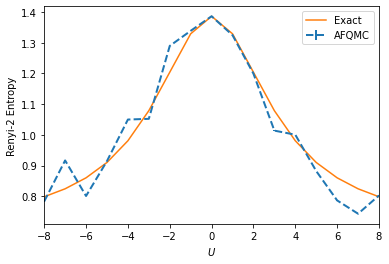

In [55]:
plot_etgent_two_site("./data/two_site/processed/EtgEnt_LA1_N2_beta50.0_seed1234.jld")

[0.13546929 0.72906142 0.13546929]


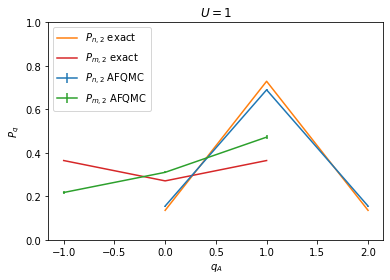

In [26]:
plot_distribution_two_site("./data/1x2/processed/Pq2_LA1_N2_beta18.0_seed1234.jld", 1)

<Figure size 432x288 with 0 Axes>

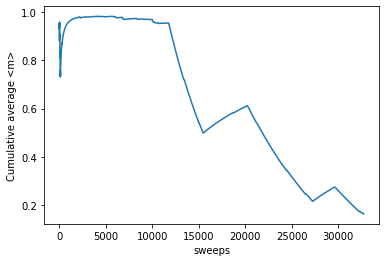

<Figure size 432x288 with 0 Axes>

In [9]:
file = h5py.File("./data/test/processed/Pq2_LA1_N2_U5.0_beta18.0_dt0.1_seed1234.jld")
Pm2 = np.array(file["Pm2"])

def real(x):
    return x[0]

real = np.vectorize(real)

Pm2 = real(Pm2)

M = Pm2[:, 2] - Pm2[:, 0]

avg = np.cumsum(M) / (np.arange(len(M)) + 1)

plt.plot(avg)
plt.xlabel("sweeps")
plt.ylabel("Cumulative average <m>")
plt.figure(facecolor='white')

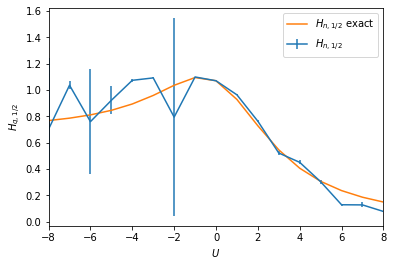

In [14]:
plot_n_shannon("./data/two_site/processed/Hq2_LA1_N2_beta18.0_seed1234.jld")

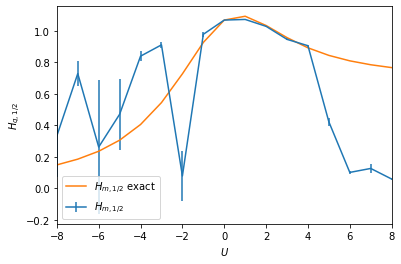

In [15]:
plot_m_shannon("./data/two_site/processed/Hq2_LA1_N2_beta18.0_seed1234.jld")

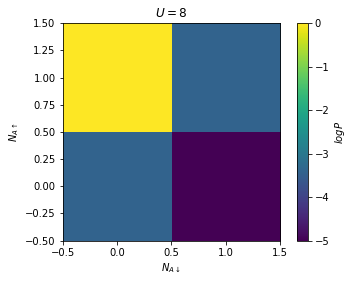

In [110]:
plot_heatmap("./data/two_site/processed/Pq2_LA1_N2_beta18.0_seed1234.jld", 8)